In [13]:
import os
import matplotlib.pyplot as plt
import data_filter as dafi
import estimate_height as esth

C = 299792458 # m/s
FREQUENCY_GPS_L1 = 1575.42 * 10**6
WAVELENTH_GPS_S1 = C/FREQUENCY_GPS_L1

FREQUENCY_GLONASS_L1 = 1602 * 10**6
WAVELENTH_GLONASS_S1 = C/FREQUENCY_GLONASS_L1

In [14]:
main_path = os.path.abspath('../data/20221004/3/')
data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()

In [ ]:
azimut_mask = [270,330]
elevation_mask = [0,25]
min_height = 1
max_height = 3 # meter
time_length = 25 # minutes

In [15]:
for satellite_code in satellite_list:
    data_dict[satellite_code] = dafi.azimut_filter(data_dict[satellite_code],azimut_mask)
    data_dict[satellite_code] = dafi.elevation_filter(data_dict[satellite_code],elevation_mask)
time_dict = {}
height_dict = {}
azimut_dict = {}
frequency_dict = {}
power_dict = {}
for satellite_code in satellite_list:
    dataframe = data_dict[satellite_code]
    try:
        if satellite_code[0]=='R':
            time_dict[satellite_code], height_dict[satellite_code], azimut_dict[satellite_code],\
            frequency_dict[satellite_code],power_dict[satellite_code] =\
            esth.split_result(dataframe,WAVELENTH_GLONASS_S1,time_length,min_height=1,max_height=4)
        else:
            time_dict[satellite_code], height_dict[satellite_code], azimut_dict[satellite_code],\
            frequency_dict[satellite_code],power_dict[satellite_code] =\
            esth.split_result(dataframe,WAVELENTH_GPS_S1,time_length,min_height=1,max_height=4)
    except IndexError:
        continue

In [16]:
# for i,_ in enumerate(frequency_list):
#     plt.plot(frequency_list[i],power_list[i],label=time_list[i])
# plt.legend(loc="best")

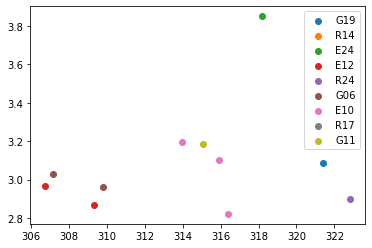

In [17]:
for satellite_code in time_dict:
    plt.scatter(azimut_dict[satellite_code],height_dict[satellite_code],label=satellite_code)

plt.legend(loc="best")